# How to calibrate a magnetometer

## Step 1: Load uncalibrated magmetometer data as CSV

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rawdata = pd.read_csv('raw_magnetometer_data.csv')

## Step 2: Visualize the data to see what is going on

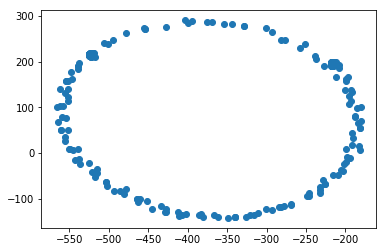

In [32]:
plt.scatter(rawdata["x"], rawdata["y"], label='Data Points')
plt.show()

## Step 3: Find the hard iron offsets

In [36]:
xcol = rawdata["x"]
ycol = rawdata["y"]

xmin = xcol.min()
xmax = xcol.max()

ymin = ycol.min()
ymax = ycol.max()

hardiron_x = (xmin + xmax) / 2
hardiron_y = (ymin + ymax) / 2

width = xmax - xmin
height = ymax - ymin
xyratio = width / height

[hardiron_x, hardiron_y, xyratio, width, height]

[-373.05999999999995,
 74.52000000000001,
 0.8914893617021274,
 385.47999999999996,
 432.40000000000003]

## Step 4: Apply hard iron offsets to data

In [34]:
correctedx = rawdata["x"].apply(lambda value: value - hardiron_x)
correctedy = rawdata["y"].apply(lambda value: (value - hardiron_y) * xyratio)
correcteddata = pd.DataFrame().assign(x=correctedx, y=correctedy)

## Finally, the corrected data

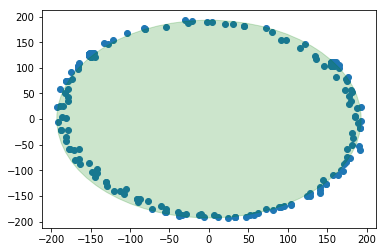

In [35]:
circle = plt.Circle((0, 0), width / 2, color='g', alpha=0.2)

fig, ax = plt.subplots()
ax.add_patch(circle)
ax.scatter(correcteddata["x"], correcteddata["y"], label='Data Points')

plt.show()